# Kaggle-coronavirus-visualisation part1 - update version
* Today's goal
    * EDA 20.01.21 ~ 20.01.31
        * Visualization
            * Increasing number of confirmed patients and Increasing number of death.
            * Find more...

## 01. Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('2019_nCoV_20200121_20200131.csv')
data.head()

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Hubei,Mainland China,1/31/2020 19:00,7153.0,NaN,169.0,249.0
1,Zhejiang,Mainland China,1/31/2020 19:00,537.0,NaN,14.0,NaN
2,Guangdong,Mainland China,1/31/2020 19:00,436.0,NaN,10.0,NaN
3,Henan,Mainland China,1/31/2020 19:00,352.0,NaN,3.0,2.0
4,Hunan,Mainland China,1/31/2020 19:00,332.0,NaN,3.0,NaN


In [3]:
data.head(20)

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Hubei,Mainland China,1/31/2020 19:00,7153.0,NaN,169.0,249.0
1,Zhejiang,Mainland China,1/31/2020 19:00,537.0,NaN,14.0,NaN
2,Guangdong,Mainland China,1/31/2020 19:00,436.0,NaN,10.0,NaN
3,Henan,Mainland China,1/31/2020 19:00,352.0,NaN,3.0,2.0
4,Hunan,Mainland China,1/31/2020 19:00,332.0,NaN,3.0,NaN
5,Jiangxi,Mainland China,1/31/2020 19:00,240.0,NaN,7.0,NaN
6,Chongqing,Mainland China,1/31/2020 19:00,238.0,NaN,1.0,1.0
7,Anhui,Mainland China,1/31/2020 19:00,237.0,NaN,3.0,NaN
8,Shandong,Mainland China,1/31/2020 19:00,184.0,NaN,2.0,NaN
9,Sichuan,Mainland China,1/31/2020 19:00,177.0,NaN,1.0,1.0


## 02. Coronavirus Cases Over Time

In [34]:
unique_dates = list(data['Last Update'].unique())
unique_dates.sort()
unique_dates

['1/21/2020',
 '1/22/2020 12:00',
 '1/23/20 12:00 PM',
 '1/24/2020 12:00 AM',
 '1/24/2020 12:00 PM',
 '1/24/2020 4:00 PM',
 '1/25/2020 10:00 PM',
 '1/25/2020 12:00 AM',
 '1/25/2020 12:00 PM',
 '1/26/2020 11:00 AM',
 '1/26/2020 23:00',
 '1/27/2020 19:00',
 '1/27/2020 20:30',
 '1/27/2020 9:00',
 '1/28/2020 13:00',
 '1/28/2020 18:00',
 '1/28/2020 23:00',
 '1/29/2020 13:30',
 '1/29/2020 14:30',
 '1/29/2020 21:00',
 '1/30/2020 11:00',
 '1/30/2020 21:30',
 '1/31/2020 14:00',
 '1/31/2020 17:00',
 '1/31/2020 19:00']

시간에 따른 코로나 확진자 증가추이를 그래프로 시각화해보자

In [5]:
world_confirmed_cases = []

for date in unique_dates:
    world_confirmed_cases.append(data[data['Last Update'] == date].Confirmed.sum())
   
world_confirmed_cases

[332.0,
 555.0,
 653.0,
 881.0,
 939.0,
 2.0,
 1156.0,
 1354.0,
 2301.0,
 2116.0,
 2794.0,
 2927.0,
 4473.0,
 2886.0,
 4690.0,
 5579.0,
 6056.0,
 6164.0,
 6165.0,
 7783.0,
 8235.0,
 9776.0,
 9923.0,
 3.0,
 11374.0]

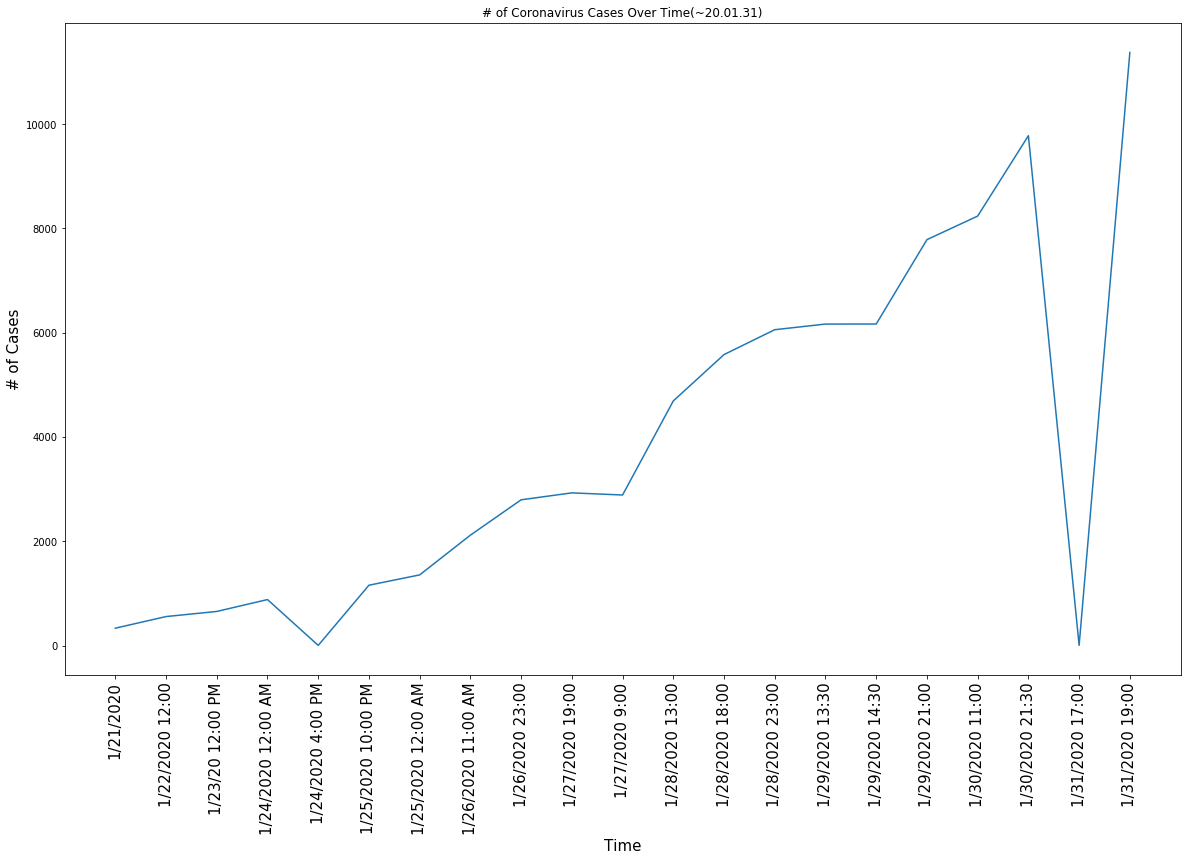

In [12]:
plt.figure(figsize=(20, 12))
plt.plot(unique_dates, world_confirmed_cases)
plt.title("# of Coronavirus Cases Over Time(~20.01.31)")
plt.xlabel("Time", size = 15)
plt.ylabel("# of Cases", size = 15)
plt.xticks(rotation=90, size = 15)
plt.show()

In [35]:
excess_time = ['1/24/2020 4:00 PM', '1/26/2020 11:00 AM', '1/27/2020 9:00', '1/31/2020 17:00']
excess_time

['1/24/2020 4:00 PM',
 '1/26/2020 11:00 AM',
 '1/27/2020 9:00',
 '1/31/2020 17:00']

In [36]:
for i in excess_time:
    unique_dates.remove(i)
    
print(unique_dates)
print(len(unique_dates))

['1/21/2020', '1/22/2020 12:00', '1/23/20 12:00 PM', '1/24/2020 12:00 AM', '1/24/2020 12:00 PM', '1/25/2020 10:00 PM', '1/25/2020 12:00 AM', '1/25/2020 12:00 PM', '1/26/2020 23:00', '1/27/2020 19:00', '1/27/2020 20:30', '1/28/2020 13:00', '1/28/2020 18:00', '1/28/2020 23:00', '1/29/2020 13:30', '1/29/2020 14:30', '1/29/2020 21:00', '1/30/2020 11:00', '1/30/2020 21:30', '1/31/2020 14:00', '1/31/2020 19:00']
21


In [37]:
len(unique_dates)

21

In [38]:
world_confirmed_cases = []

for date in unique_dates:
    # print(date)
    world_confirmed_cases.append(data[data['Last Update'] == date].Confirmed.sum())
   
world_confirmed_cases

[332.0,
 555.0,
 653.0,
 881.0,
 939.0,
 1156.0,
 1354.0,
 2301.0,
 2794.0,
 2927.0,
 4473.0,
 4690.0,
 5579.0,
 6056.0,
 6164.0,
 6165.0,
 7783.0,
 8235.0,
 9776.0,
 9923.0,
 11374.0]

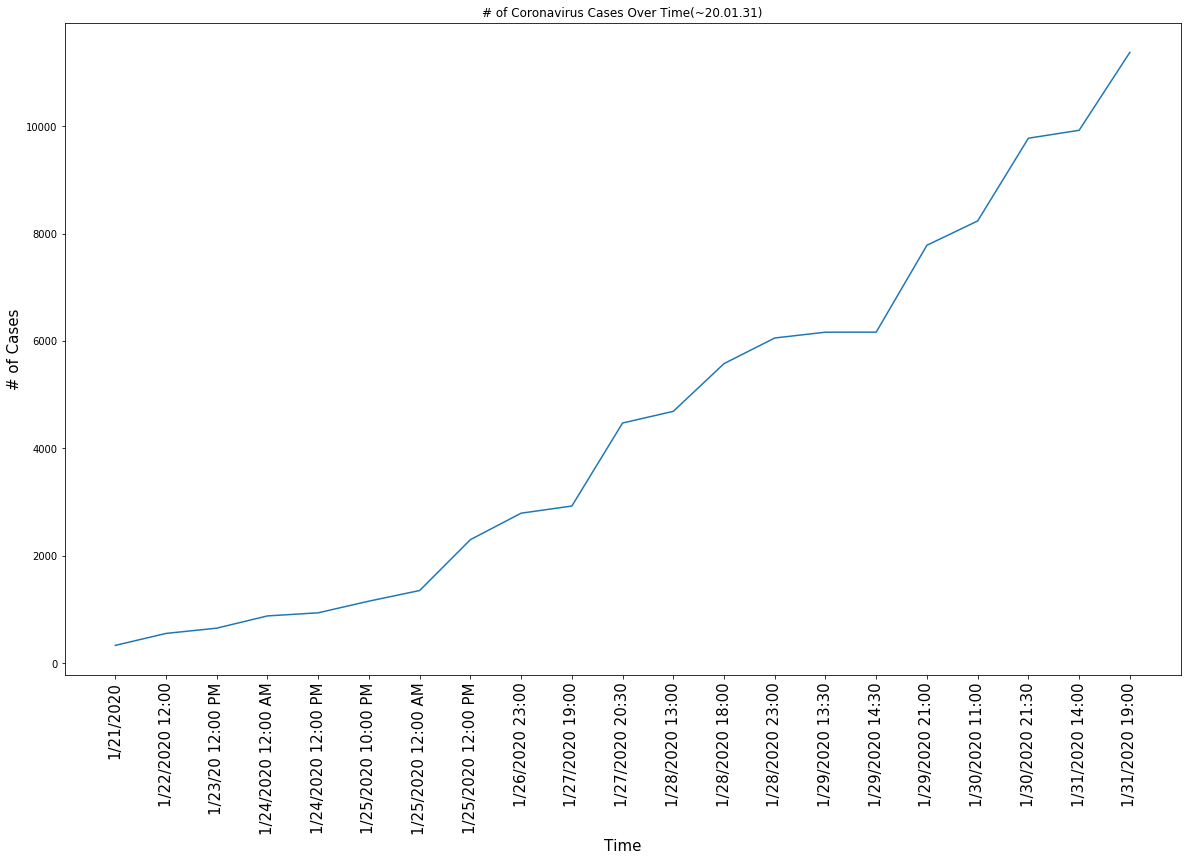

In [40]:
plt.figure(figsize=(20, 12))
plt.plot(unique_dates, world_confirmed_cases)
plt.title("# of Coronavirus Cases Over Time(~20.01.31)")
plt.xlabel("Time", size = 15)
plt.ylabel("# of Cases", size = 15)
plt.xticks(rotation=90, size = 15)
plt.show()

#### 일별 최종 데이터로 바라보면 어떨까?

In [50]:
unique_dates = list(data['Last Update'].unique())
unique_dates.sort()
unique_dates

['1/21/2020',
 '1/22/2020 12:00',
 '1/23/20 12:00 PM',
 '1/24/2020 12:00 AM',
 '1/24/2020 12:00 PM',
 '1/24/2020 4:00 PM',
 '1/25/2020 10:00 PM',
 '1/25/2020 12:00 AM',
 '1/25/2020 12:00 PM',
 '1/26/2020 11:00 AM',
 '1/26/2020 23:00',
 '1/27/2020 19:00',
 '1/27/2020 20:30',
 '1/27/2020 9:00',
 '1/28/2020 13:00',
 '1/28/2020 18:00',
 '1/28/2020 23:00',
 '1/29/2020 13:30',
 '1/29/2020 14:30',
 '1/29/2020 21:00',
 '1/30/2020 11:00',
 '1/30/2020 21:30',
 '1/31/2020 14:00',
 '1/31/2020 17:00',
 '1/31/2020 19:00']

In [60]:
dfObj = pd.DataFrame(unique_dates, columns=['Dates'])
dfObj

,Dates
0,1/21/2020
1,1/22/2020 12:00
2,1/23/20 12:00 PM
3,1/24/2020 12:00 AM
4,1/24/2020 12:00 PM
5,1/24/2020 4:00 PM
6,1/25/2020 10:00 PM
7,1/25/2020 12:00 AM
8,1/25/2020 12:00 PM
9,1/26/2020 11:00 AM


In [64]:
import pandas as pd
import datetime

# Reference: https://stackoverflow.com/questions/29886609/find-most-recent-date-in-pandas-dataframe

dfObj['Dates'] = pd.to_datetime(dfObj['Dates'])
least_recent_date = dfObj['Dates'].min()
recent_date = dfObj['Dates'].max()

In [65]:
least_recent_date

Timestamp('2020-01-21 00:00:00')

In [67]:
recent_date

Timestamp('2020-01-31 19:00:00')

In [70]:
dfObj['Dates']

0    2020-01-21 00:00:00
1    2020-01-22 12:00:00
2    2020-01-23 12:00:00
3    2020-01-24 00:00:00
4    2020-01-24 12:00:00
5    2020-01-24 16:00:00
6    2020-01-25 22:00:00
7    2020-01-25 00:00:00
8    2020-01-25 12:00:00
9    2020-01-26 11:00:00
10   2020-01-26 23:00:00
11   2020-01-27 19:00:00
12   2020-01-27 20:30:00
13   2020-01-27 09:00:00
14   2020-01-28 13:00:00
15   2020-01-28 18:00:00
16   2020-01-28 23:00:00
17   2020-01-29 13:30:00
18   2020-01-29 14:30:00
19   2020-01-29 21:00:00
20   2020-01-30 11:00:00
21   2020-01-30 21:30:00
22   2020-01-31 14:00:00
23   2020-01-31 17:00:00
24   2020-01-31 19:00:00
Name: Dates, dtype: datetime64[ns]

# Reference 좌표
https://stackoverflow.com/questions/52909610/pandas-getting-first-and-last-value-from-each-day-in-a-datetime-dataframe/52909784

In [47]:
unique_dates[0][2:4]

'21'

### 최근(1월 31일 데이터를 분석해보자

In [18]:
latest_day = data[data['Last Update'] == '1/31/2020 19:00']
latest_day

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Hubei,Mainland China,1/31/2020 19:00,7153.0,NaN,169.0,249.0
1,Zhejiang,Mainland China,1/31/2020 19:00,537.0,NaN,14.0,NaN
2,Guangdong,Mainland China,1/31/2020 19:00,436.0,NaN,10.0,NaN
3,Henan,Mainland China,1/31/2020 19:00,352.0,NaN,3.0,2.0
4,Hunan,Mainland China,1/31/2020 19:00,332.0,NaN,3.0,NaN
...,...,...,...,...,...,...,...
58,NaN,Italy,1/31/2020 19:00,2.0,NaN,NaN,NaN
59,NaN,Sweden,1/31/2020 19:00,1.0,NaN,NaN,NaN
60,NaN,Russia,1/31/2020 19:00,2.0,NaN,NaN,NaN
61,NaN,Spain,1/31/2020 19:00,1.0,NaN,NaN,NaN


이 데이터로 어떤 재미있는 분석을 해볼 수 있을까?

In [10]:
latest_day[latest_day['Province/State'].isnull() == False]

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Hubei,Mainland China,1/31/2020 19:00,7153.0,NaN,169.0,249.0
1,Zhejiang,Mainland China,1/31/2020 19:00,537.0,NaN,14.0,NaN
2,Guangdong,Mainland China,1/31/2020 19:00,436.0,NaN,10.0,NaN
3,Henan,Mainland China,1/31/2020 19:00,352.0,NaN,3.0,2.0
4,Hunan,Mainland China,1/31/2020 19:00,332.0,NaN,3.0,NaN
5,Jiangxi,Mainland China,1/31/2020 19:00,240.0,NaN,7.0,NaN
6,Chongqing,Mainland China,1/31/2020 19:00,238.0,NaN,1.0,1.0
7,Anhui,Mainland China,1/31/2020 19:00,237.0,NaN,3.0,NaN
8,Shandong,Mainland China,1/31/2020 19:00,184.0,NaN,2.0,NaN
9,Sichuan,Mainland China,1/31/2020 19:00,177.0,NaN,1.0,1.0


### 중국 내 자치구 별로 확진자와 사망자는 어떨까?

In [24]:
latest_china_province = latest_day[(latest_day['Province/State'].isnull() == False) | (latest_day['Country/Region'] == 'Mainland China')]
latest_china_province

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Hubei,Mainland China,1/31/2020 19:00,7153.0,NaN,169.0,249.0
1,Zhejiang,Mainland China,1/31/2020 19:00,537.0,NaN,14.0,NaN
2,Guangdong,Mainland China,1/31/2020 19:00,436.0,NaN,10.0,NaN
3,Henan,Mainland China,1/31/2020 19:00,352.0,NaN,3.0,2.0
4,Hunan,Mainland China,1/31/2020 19:00,332.0,NaN,3.0,NaN
5,Jiangxi,Mainland China,1/31/2020 19:00,240.0,NaN,7.0,NaN
6,Chongqing,Mainland China,1/31/2020 19:00,238.0,NaN,1.0,1.0
7,Anhui,Mainland China,1/31/2020 19:00,237.0,NaN,3.0,NaN
8,Shandong,Mainland China,1/31/2020 19:00,184.0,NaN,2.0,NaN
9,Sichuan,Mainland China,1/31/2020 19:00,177.0,NaN,1.0,1.0


* china에서 사망자 수와 확진자 수를 plot로 그려보자!

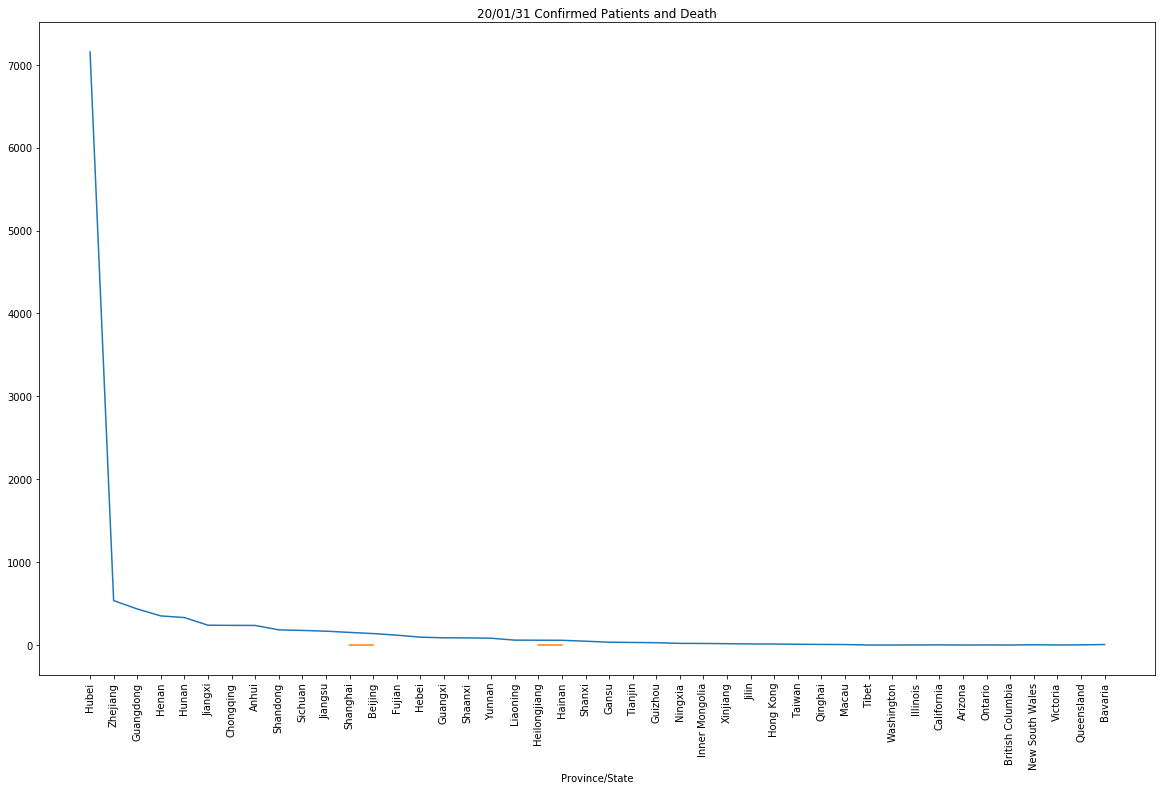

In [18]:

plt.figure(figsize=(20, 12))
plt.plot(latest_china_province['Province/State'], latest_china_province['Confirmed'])
plt.plot(latest_china_province['Province/State'], latest_china_province['Death'])
plt.title("20/01/31 Confirmed Patients and Death")
plt.xlabel("Province/State")
plt.xticks(rotation=90)
plt.show()


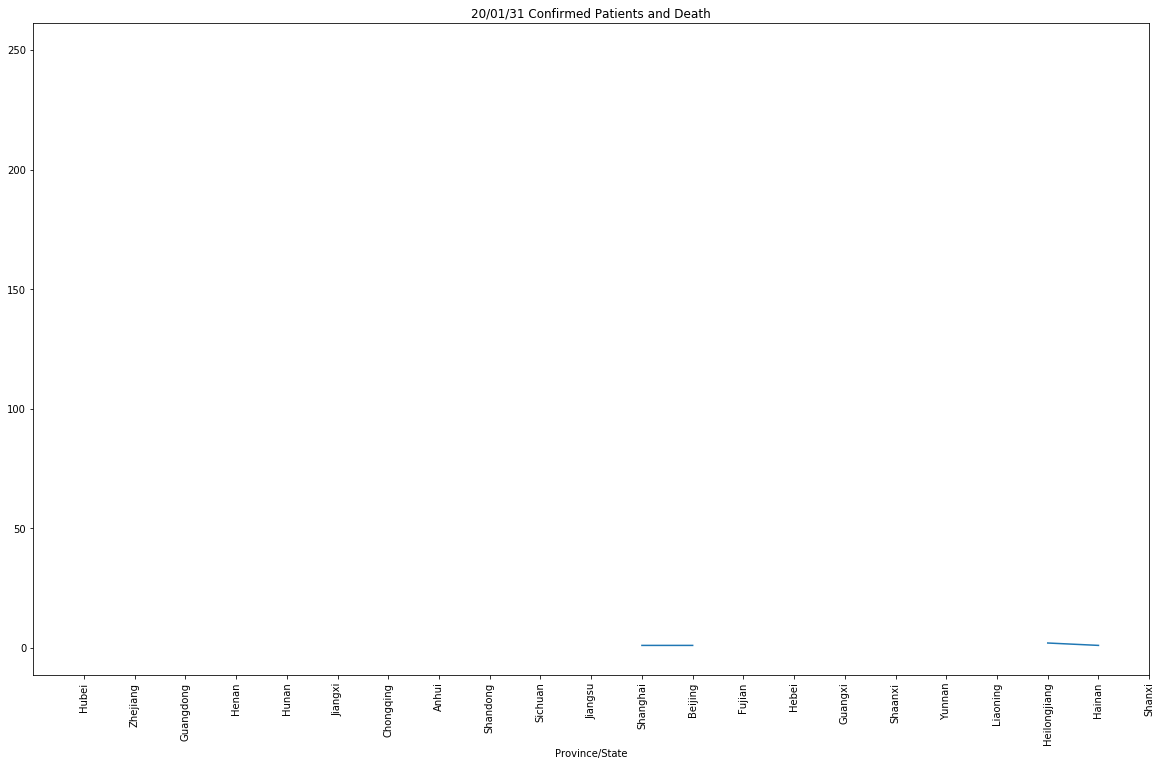

In [20]:

plt.figure(figsize=(20, 12))
# plt.plot(latest_china_province['Province/State'], latest_china_province['Confirmed'])
plt.plot(latest_china_province['Province/State'], latest_china_province['Death'])
plt.title("20/01/31 Confirmed Patients and Death")
plt.xlabel("Province/State")
plt.xticks(rotation=90)
plt.show()


Q. 왜 이렇게 표시되는거지...?

In [35]:
latest_china_province = latest_china_province.fillna(0)
latest_china_province.head()

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Hubei,Mainland China,1/31/2020 19:00,7153.0,0.0,169.0,249.0
1,Zhejiang,Mainland China,1/31/2020 19:00,537.0,0.0,14.0,0.0
2,Guangdong,Mainland China,1/31/2020 19:00,436.0,0.0,10.0,0.0
3,Henan,Mainland China,1/31/2020 19:00,352.0,0.0,3.0,2.0
4,Hunan,Mainland China,1/31/2020 19:00,332.0,0.0,3.0,0.0


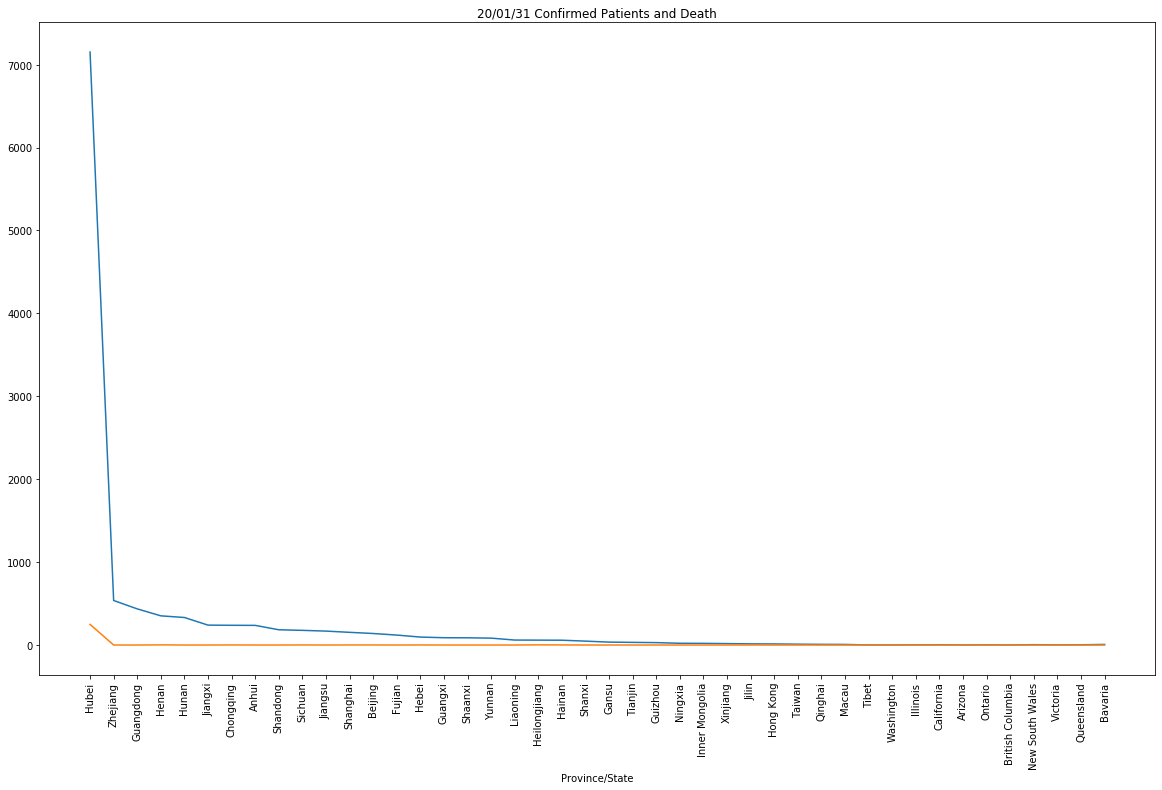

In [38]:
plt.figure(figsize=(20, 12))
plt.plot(latest_china_province['Province/State'], latest_china_province['Confirmed'])
plt.plot(latest_china_province['Province/State'], latest_china_province['Death'])
plt.title("20/01/31 Confirmed Patients and Death")
plt.xlabel("Province/State")
plt.xticks(rotation=90)
plt.show()


+ 여기에 취사율을 더해보자

In [41]:
# Mortality Rate of Coronavirus

def mortality_rate(confirmed, death):
    motality_rate = death / confirmed * 100
    return motality_rate

In [48]:
mortality_rate = mortality_rate(latest_china_province['Confirmed'], latest_china_province['Death'])

In [49]:
len(mortality_rate)

44

In [50]:
len(latest_china_province['Province/State'])

44

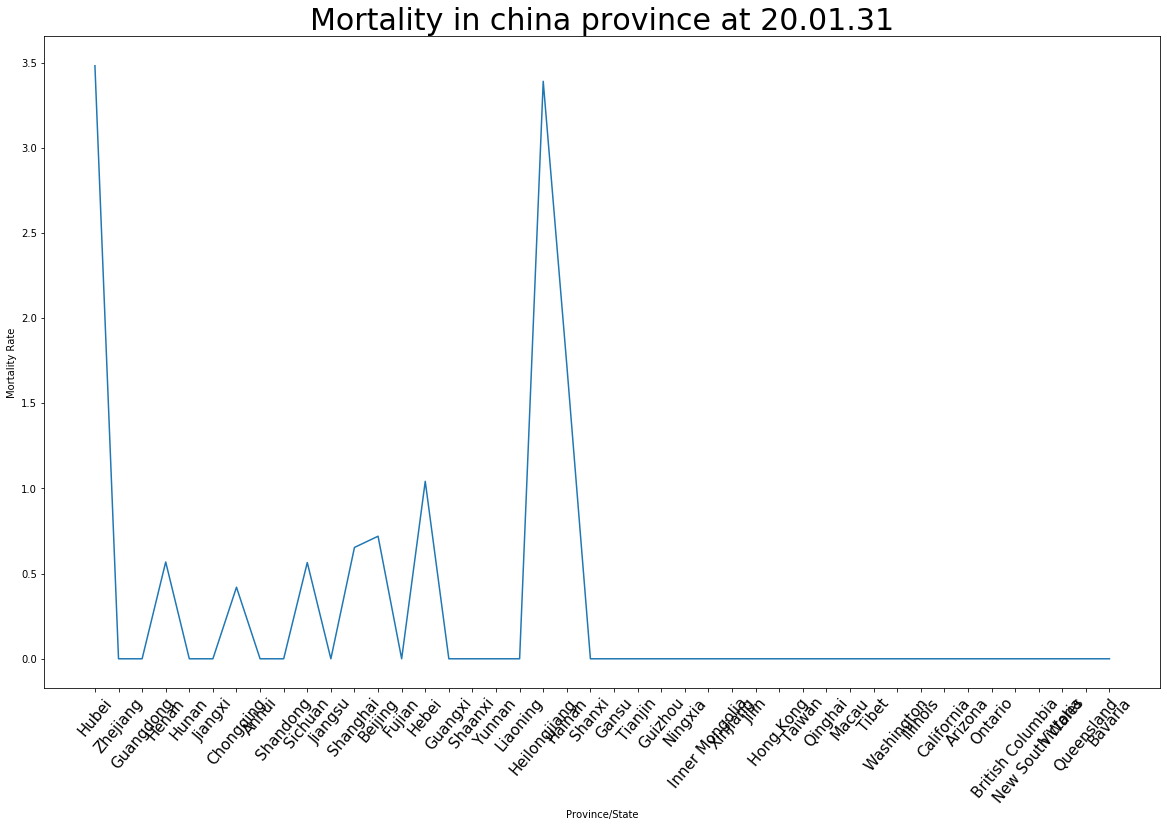

In [52]:
plt.figure(figsize=(20, 12))
plt.plot(latest_china_province['Province/State'], mortality_rate)
plt.title("Mortality in china province at 20.01.31", size = 30)
plt.xlabel("Province/State")
plt.ylabel("Mortality Rate")
plt.xticks(rotation=50, size = 15)
plt.show()

31일 기준 평균 취사율은 어떻게 될까?

In [54]:
mortality_rate = np.array(mortality_rate)
mortality_rate

array([3.4810569 , 0.        , 0.        , 0.56818182, 0.        ,
       0.        , 0.42016807, 0.        , 0.        , 0.56497175,
       0.        , 0.65359477, 0.71942446, 0.        , 1.04166667,
       0.        , 0.        , 0.        , 0.        , 3.38983051,
       1.72413793, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [56]:
mortality_rate.sum()/44

0.28552347440621545

이 수치만으로는 취사율을 판단할 수 없을것 같은데?

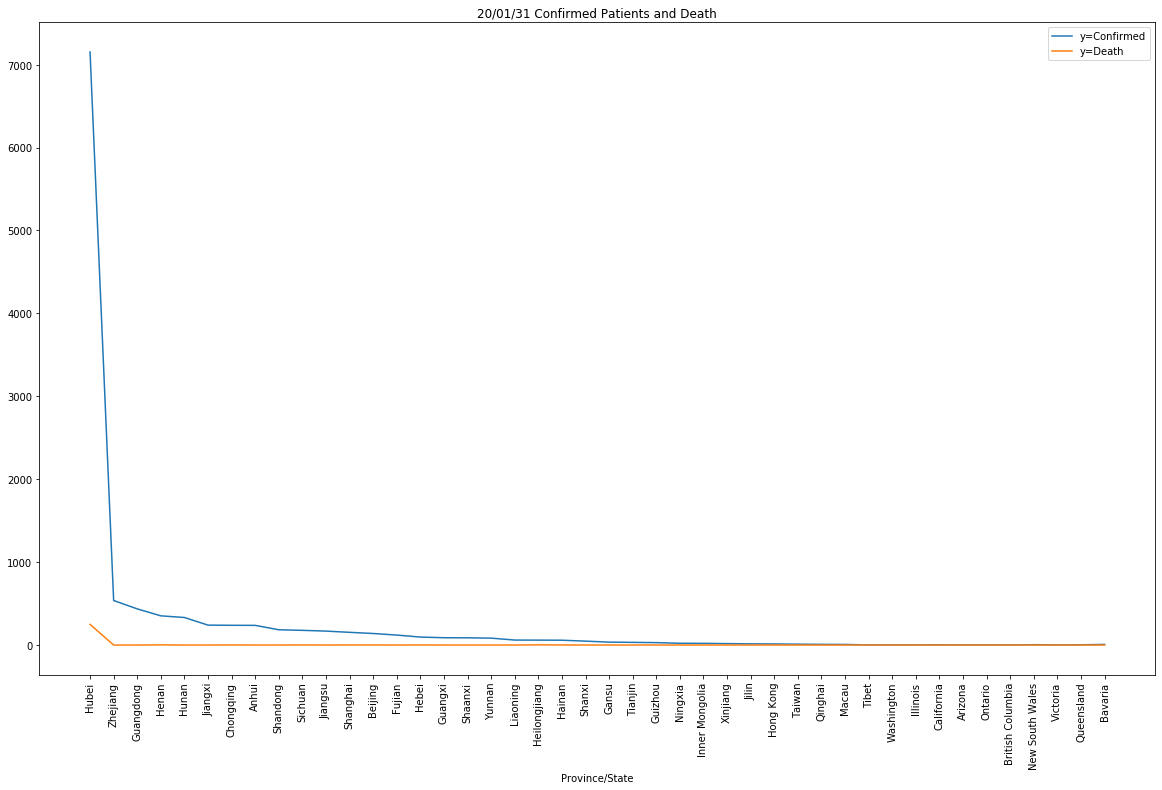

In [59]:
plt.figure(figsize=(20, 12))
plt.plot(latest_china_province['Province/State'], latest_china_province['Confirmed'])
plt.plot(latest_china_province['Province/State'], latest_china_province['Death'])
# plt.plot(latest_china_province['Province/State'], mortality_rate)
plt.title("20/01/31 Confirmed Patients and Death")
plt.xlabel("Province/State")
plt.xticks(rotation=90)
plt.legend(['y=Confirmed', 'y=Death', 'y=mortality_rate'])
plt.show()

## Anyway
* 1월 21일부터 31일까지 열흘간 확진자 수가 얼마나 증가했는지 직접 두 눈으로 파악해보자
* 잠복기는 2일에서 최대 14일이라는데 우선은 현재 사태를 파악해보자

In [60]:
data.head()

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Hubei,Mainland China,1/31/2020 19:00,7153.0,NaN,169.0,249.0
1,Zhejiang,Mainland China,1/31/2020 19:00,537.0,NaN,14.0,NaN
2,Guangdong,Mainland China,1/31/2020 19:00,436.0,NaN,10.0,NaN
3,Henan,Mainland China,1/31/2020 19:00,352.0,NaN,3.0,2.0
4,Hunan,Mainland China,1/31/2020 19:00,332.0,NaN,3.0,NaN


In [61]:
data

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Hubei,Mainland China,1/31/2020 19:00,7153.0,NaN,169.0,249.0
1,Zhejiang,Mainland China,1/31/2020 19:00,537.0,NaN,14.0,NaN
2,Guangdong,Mainland China,1/31/2020 19:00,436.0,NaN,10.0,NaN
3,Henan,Mainland China,1/31/2020 19:00,352.0,NaN,3.0,2.0
4,Hunan,Mainland China,1/31/2020 19:00,332.0,NaN,3.0,NaN
...,...,...,...,...,...,...,...
1120,Heilongjiang,Mainland China,1/21/2020,NaN,1.0,NaN,NaN
1121,NaN,Japan,1/21/2020,1.0,NaN,NaN,NaN
1122,NaN,Thailand,1/21/2020,2.0,NaN,NaN,NaN
1123,NaN,South Korea,1/21/2020,1.0,NaN,NaN,NaN


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 7 columns):
Province/State    889 non-null object
Country/Region    1125 non-null object
Last Update       1125 non-null object
Confirmed         1095 non-null float64
Suspected         88 non-null float64
Recovered         247 non-null float64
Death             127 non-null float64
dtypes: float64(4), object(3)
memory usage: 61.6+ KB
